We want to fit some data to the following form.
$$ y = n y_{int}^2,
$$

where

$$
y_{int} = n \exp(-a y_{int} ) $$

# Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data

In [ ]:
# Seed for reproducibility
np.random.seed(42)

# Generate 10 random x values within a range
x_generated = np.linspace(0, 5, 10)

# Parameters for the function (can use the previously fitted values or set randomly)
n_true = 0.06
a_true = 0.25
m_true = 0.57
b_true = 0.11

# Generate corresponding y values based on the function with added noise
noise = 0.001 * np.random.normal(0, 0.1, size=x_generated.shape)  # Add Gaussian noise
y_generated = n_true * np.exp(-a_true * (m_true * x_generated + b_true) ** 2) + noise

# Display the generated x and y arrays
x_generated, y_generated

(array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 array([0.05986845, 0.05731671, 0.05232358, 0.04545853, 0.03733439,
        0.02927403, 0.02201051, 0.01557923, 0.01041288, 0.00676658]))

# Gradient Descent and Backpropagation

$$
\text{Loss}(n, a, m, b) = \frac{1}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right)^2
$$

In [ ]:
def compute_loss(x, y, n, a, m, b):
    """
    Compute the Mean Squared Error (MSE) loss.

    Parameters:
    x : np.array
        Input data points (x values).
    y : np.array
        Actual output data points (y values).
    n, a, m, b : float
        Parameters of the function y = n * exp(-a * (m * x + b)^2).

    Returns:
    float
        Mean Squared Error (MSE) loss.
    """
    y_int = (m * x + b) ** 2
    y_pred = n * np.exp(-a * y_int)
    return np.mean((y - y_pred) ** 2)

**Gradients of the loss function**
$$
\frac{\partial \text{Loss}}{\partial n} = -\frac{2}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right) \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right)
$$

$$
\frac{\partial \text{Loss}}{\partial a} = \frac{2}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right) \cdot n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \cdot \left(-\left(m \cdot x_i + b\right)^2\right)
$$

$$
\frac{\partial \text{Loss}}{\partial m} = \frac{2}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right) \cdot n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \cdot \left(-2a \cdot \left(m \cdot x_i + b\right) \cdot x_i\right)
$$

$$
\frac{\partial \text{Loss}}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( y_i - n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \right) \cdot n \cdot \exp\left(-a \cdot \left(m \cdot x_i + b\right)^2\right) \cdot \left(-2a \cdot \left(m \cdot x_i + b\right)\right)
$$

**Parameter updates**

$$
n \leftarrow n - \eta \frac{\partial \text{Loss}}{\partial n}, \quad a \leftarrow a - \eta \frac{\partial \text{Loss}}{\partial a}
$$

$$
m \leftarrow m - \eta \frac{\partial \text{Loss}}{\partial m}, \quad b \leftarrow b - \eta \frac{\partial \text{Loss}}{\partial b}
$$

In [ ]:
# Generate data points directly as NumPy arrays (without pandas)
x_data = x_generated
y_data = y_generated

# Reinitialize parameters (n, a, m, b)
n_fit = np.random.rand()
a_fit = np.random.rand()
m_fit = np.random.rand()
b_fit = np.random.rand()

epochs = 10000
learning_rate = 0.001

# Perform gradient descent for the generated data
for epoch in range(epochs):
    # Forward pass: compute intermediate and final outputs
    y_int_fit = (m_fit * x_data + b_fit) ** 2
    y_pred_fit = n_fit * np.exp(-a_fit * y_int_fit)

    # Compute gradients
    # Gradients for n and a (output layer)
    grad_n_fit = -2 * np.mean((y_data - y_pred_fit) * np.exp(-a_fit * y_int_fit))
    grad_a_fit = 2 * np.mean((y_data - y_pred_fit) * n_fit * np.exp(-a_fit * y_int_fit) * (-y_int_fit))

    # Gradients for m and b (inner layer)
    grad_m_fit = 2 * np.mean((y_data - y_pred_fit) * n_fit * np.exp(-a_fit * y_int_fit) * (-a_fit) * (2 * (m_fit * x_data + b_fit) * x_data))
    grad_b_fit = 2 * np.mean((y_data - y_pred_fit) * n_fit * np.exp(-a_fit * y_int_fit) * (-a_fit) * (2 * (m_fit * x_data + b_fit)))

    # Update parameters
    n_fit -= learning_rate * grad_n_fit
    a_fit -= learning_rate * grad_a_fit
    m_fit -= learning_rate * grad_m_fit
    b_fit -= learning_rate * grad_b_fit

    # Compute loss for monitoring
    loss_fit = compute_loss(x_data, y_data, n_fit, a_fit, m_fit, b_fit)

    # Print loss every 100 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss_fit:.6f}")

# Final fitted parameter values
n_fit, a_fit, m_fit, b_fit

Epoch 0: Loss = 0.007087
Epoch 1000: Loss = 0.003973
Epoch 2000: Loss = 0.001995
Epoch 3000: Loss = 0.000934
Epoch 4000: Loss = 0.000423
Epoch 5000: Loss = 0.000191
Epoch 6000: Loss = 0.000090
Epoch 7000: Loss = 0.000047
Epoch 8000: Loss = 0.000029
Epoch 9000: Loss = 0.000021


(0.08434079365064838,
 0.31516709344083577,
 0.42750907255792414,
 0.7562768576799567)

# Visualization

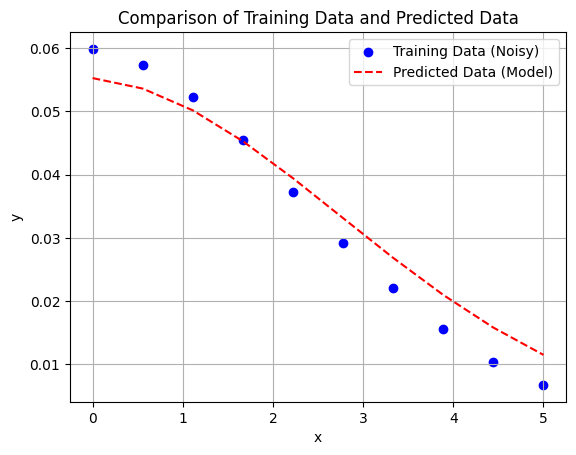

In [ ]:
# Predicted y values using the fitted parameters
y_predicted = n_fit * np.exp(-a_fit * (m_fit * x_generated + b_fit) ** 2)

# Plot the training data
plt.scatter(x_generated, y_generated, color='blue', label='Training Data (Noisy)', marker='o')

# Plot the predicted data
plt.plot(x_generated, y_predicted, color='red', label='Predicted Data (Model)', linestyle='--')

# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Training Data and Predicted Data")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()